# Data-driven Business and Behaviour Analytics (DBBA)
# Lab session: 1 - First steps with NetworkX

The Python package we will use to study and analyse networks is [NetworkX](https://networkx.org/documentation/stable/). Here we cover some basic examples.

To install the package, you can install the conda environment available on the website (the *.yml* file) following these instructions:
- using your terminal, navigate to the folder containing the environment file
- write on your terminal `conda env create -f dbba_env.yml`
- always activate the environment before using your IDE or jupyter-notebook, using `conda activate dbba_env` on your terminal

*NOTE* If for any reason you cannot make the environment work, you can install the python packages normally by running `conda install networkx` or, from a jupyter-notebook,

In [2]:
# !conda install networkx

Once installed, to load the module into your Python session you have to use the `import` statement. Note also that you can use a short alias to enhance performance.

In [2]:
import networkx as nx

After loading the package, we double-check the version to be safe we will use the last available version.

In [3]:
nx.__version__

'3.1'

In [4]:
%matplotlib inline 
# this just to make the plots be plotted here creating no new windows 

## Creating and plotting our first network

Here we create the basic object of the NetworkX library, the `Graph`, which is an undirected network. 

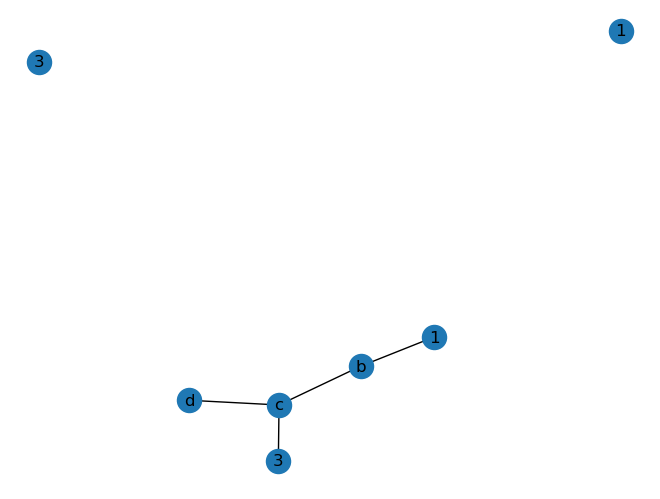

In [6]:
# creating the Graph object
G = nx.Graph()

# Once created, the network is empy. Let's add some nodes!
# We could do that in two different ways: first, adding them one by one
G.add_node(1)
G.add_node(3)

# Second, creating a list of nodes and using it
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# Studying nodes only provides generally little information on them. The benefit of studying 
# networks lies in the connections that arise. Let's build some links in our network!
# Again, we have two ways: first, adding links one by one
G.add_edge('1', 'b')

# or from a list of 2-dimensional tuples
edges_to_add = [('3', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# note that the order (first or second place in a link) doesn't matter as we are dealing with undirected networks

# draw the graph
nx.draw(G, with_labels=True)

The plot can be customized in many ways by modifying the arguments in `draw`. [Here](https://networkx.org/documentation/stable//reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) a comprehensive guide.

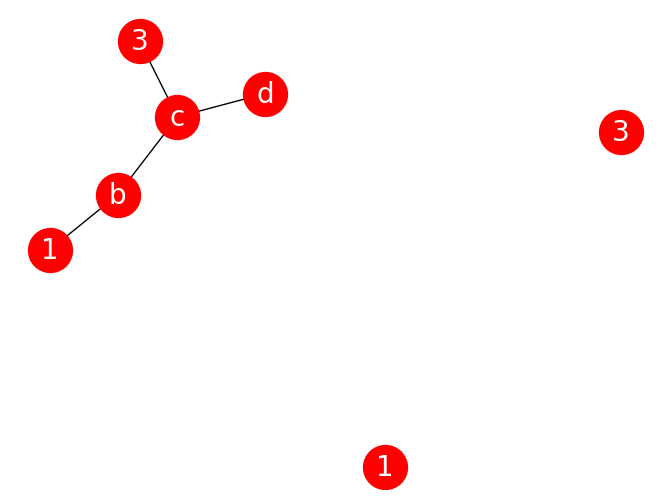

In [7]:
nx.draw(G,
        with_labels=True,
        node_color='red',
        node_size=1000,
        font_color='white',
        font_size=20,
        )

## Examining the properties of a network

A Graph object has several methods and properties which provide precious information.

In [8]:
# List all of the nodes
G.nodes()

NodeView((1, 3, 'b', 'c', 'd', '1', '3'))

In [9]:
# List all of the edges
G.edges()

EdgeView([('b', '1'), ('b', 'c'), ('c', '3'), ('c', 'd')])

NodeView and EdgeView objects behave exactly like a list: you can iterate over them with a for loop.

In [10]:
for edge in G.edges:
    print(edge)

('b', '1')
('b', 'c')
('c', '3')
('c', 'd')


In some cases, it can be useful to retrieve how many links or nodes a network has.

In [11]:
G.number_of_nodes()

7

In [12]:
G.number_of_edges()

4

Or, for instance, which other nodes a node is connected to. Note: for performance reasons, `neighbors()` returns an iterator which we make a list using `list()`.

In [13]:
G.neighbors('c')

In [14]:
list(G.neighbors('c'))

['3', 'b', 'd']

Or you can find convenient to loop over:

In [15]:
for neighbor in G.neighbors('b'):
    print(neighbor)

1
c


If we do not know whether a node is in a giant network or whether it is connected to another given node, we could use `has_node()` or `has_edge()`.

In [16]:
G.has_node('f')

False

Even if rough, an estimate of the importance of a given a node in a network is its degree, which we compute in the following way.

In [17]:
G.degree('d')

1

## NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [18]:
nx.is_tree(G)

False

In [19]:
nx.is_connected(G)

False

# **EXERCISE 1**
Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [20]:
def get_leaves(G):
    list = []
    for node in G.nodes():
        if G.degree(node) == 1:
            list.append(node)
    return list
            
get_leaves(G)

['d', '1', '3']

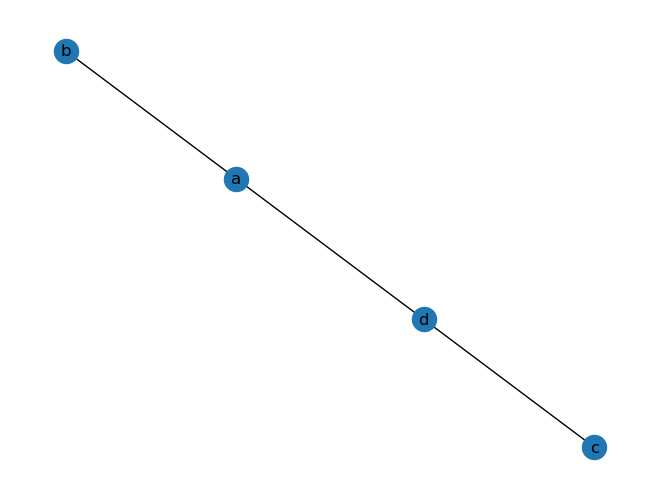

In [21]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
assert set(get_leaves(G)) == {'c', 'b'}

nx.draw(G, with_labels=True)

## Directed networks: the DiGraph object


Some types of networks require more than a bunch of symmetric relationships e.g., a causality link or a air flight. NetworkX provides the `DiGraph` class for directed graphs with additional methods and properties specific to directed edges.


In [22]:
DirG = nx.DiGraph()

DirG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)]) # note: a link can be weighted 
# through the third element of the tuple

In [23]:
DirG.out_degree(1, weight='weight')

0.5

In [24]:
DirG.degree(1, weight='weight')

1.25

Being directed, the concepts of neighbour or of degree lose importance. New ideas (but easily translatable from the undirected case) of __predecessors/successors__ and __in-degree/out-degree__ came up, which only refers to __in-links/out-links__. 

In [25]:
list(DirG.successors(1))

[2]

In [26]:
DirG.in_degree(1)

1

## Reading and writing networks

In real-world data, networks can be very large. Because of this, compact ways to store information related to nodes and links have to be found. NetworkX provides a few.

### Adjacency list

The adjacency list format consists of lines with node labels. The first label in a line is the source node. Further labels in the line are considered target nodes and are added to the graph along with an edge between the source node and target node.

```
a b c # source target target
d e
```

### Edge list

Similarly, `read_edgelist()` can read a list of edges, with the drawback of the impossibility of representing isolated nodes unless the node has a self-loop edge.

# **EXERCISE 2**

Write a function `max_degree` that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

In [27]:
# find the node with the highest degree
def max_degree(G):
    tp = ()
    degree_max = 0
    for node in G.nodes():
        if G.degree(node) > degree_max:
            tp = (node,G.degree(node))
    return tp[0]

In [28]:
# find i nodes with the highest degree
def max_degree_num(G,i):
    tps = []
    tp = ()
    for node in G.nodes():
        tp = (node,G.degree(node))
        tps.append(tp)
    sorted_tps = sorted(tps, key=lambda x: x[1], reverse=True)
    return sorted_tps[:i]

# **EXERCISE 3**

Build a correlation network based from the last year's FTSE 100 adjusted returns (ret_adjusted.csv), by using Pearson correlation. Filter it using the Minimum Spanning Tree algorithm (with `nx.minimum_spanning_tree()`. Identify the node with the maximum degree using the function just written. Check whether there are leaves.

The node with the maximum degree is RKT.L and the degree is 22
Num. Leaves: 80


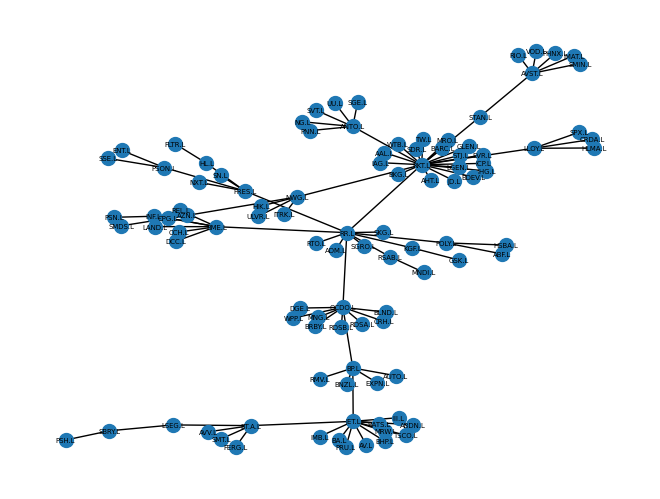

In [32]:
import pandas as pd

# Read in the data
df = pd.read_csv('retadjusted.csv')
df = df.rename(columns=lambda x: x.replace('ret.adjusted.prices.', ''))

# Create a correlation matrix
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr(method='pearson')

# Create a graph from the correlation matrix
G = nx.from_pandas_adjacency(corr_matrix)

# Calculate the Minimum Spanning Tree
T = nx.minimum_spanning_tree(G)

# pos = nx.nx_agraph.pygraphviz_layout(T)
pos = nx.spring_layout(T, weight = None)

# Draw the graph
nx.draw(T, pos, with_labels = True, 
            node_size=100,
            font_size=5,)

# Identify the node with the maximum degree
# maxDgreeNode = max_degree(T)
maxDgreeNode = max_degree_num(T,1)
print("The node with the maximum degree is " + str(maxDgreeNode[0][0]) + " and the degree is " + str(maxDgreeNode[0][1]))
# print(max_degree_num(T,5))

print('Num. Leaves:', len(get_leaves(T)))


# **EXERCISE 4**

Repeat exercise 3 but using `nx.maximum_spanning_tree()` instead. Plot both networks, and compare them. Write a list of 5 nodes with highest degree in both cases. Are there any differences? If so, why? 

The node with the maximum degree is LGEN.L and the degree is 9
[('LGEN.L', 9), ('EXPN.L', 6), ('HLMA.L', 6), ('RTO.L', 6), ('AV.L', 5)]


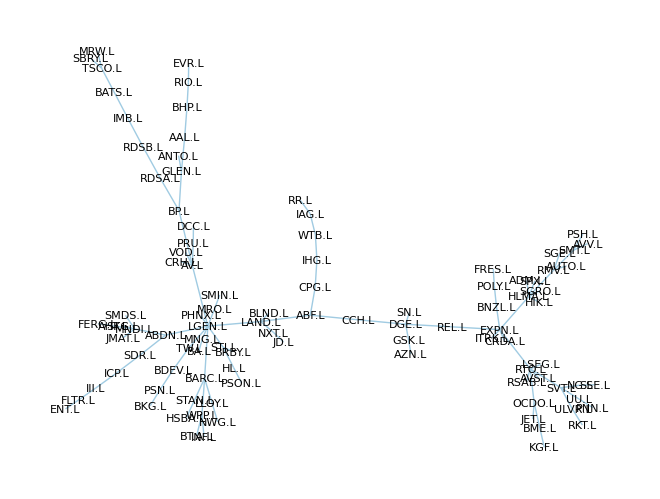

In [33]:
import pandas as pd

# Read in the data
df = pd.read_csv('retadjusted.csv')
df = df.rename(columns=lambda x: x.replace('ret.adjusted.prices.', ''))

# Create a correlation matrix
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr(method='pearson')

# Create a graph from the correlation matrix
G = nx.from_pandas_adjacency(corr_matrix)

# Calculate the Minimum Spanning Tree
T = nx.maximum_spanning_tree(G)

# pos = nx.nx_agraph.pygraphviz_layout(T)
pos = nx.spring_layout(T, weight = None)

# Draw the graph     
# nx.draw(T, pos, with_labels = True, 
#             node_size=100,
#             font_size=5,)


nx.draw(
    T,
    pos = nx.spring_layout(T, 
      iterations = 500, 
      weight = None), # Low weights of min spanning tree hinder plotting.
    node_size = 0,
    with_labels = True,
    font_color = 'black',
    font_size = 8,
    edge_color = '#A0CBE2')

# Identify the node with the maximum degree
# maxDgreeNode = max_degree(T)
maxDgreeNode = max_degree_num(T,1)
print("The node with the maximum degree is " + str(maxDgreeNode[0][0]) + " and the degree is " + str(maxDgreeNode[0][1]))
print(max_degree_num(T,5))